In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score


np.random.seed(42)

In [12]:
# Gaussian Mixture Model Parameters
# Pis
pi = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Means
means = [
    [-10.0, 0.0],
    [0.0, -10.0],
    [10.0, 0.0],
    [0.0, 10.0],
    [-5.0, 4.5],
    [5.0, 4.5],
    [0.0, -0.5],
    [0.0, -7.5],
    [-7.0, -5.5],
    [7.0, -5.5],
]

# Sigmas
covs = [
    [[0.1, 0.0], [0.0, 15.0]],
    [[15.0, 0.0], [0.0, 0.1]],
    [[0.1, 0.0], [0.0, 15.0]],
    [[15.0, 0.0], [0.0, 0.1]],
    [[3.0, 0.0], [0.0, 0.1]],
    [[1.0, 0.0], [0.0, 1.0]],
    [[0.1, 0.0], [0.0, 3.0]],
    [[4.0, 0.0], [0.0, 0.1]],
    [[0.5500000000000002, -0.45], [-0.45, 0.5499999999999999]],
    [[0.5500000000000002, 0.45], [0.45, 0.5499999999999999]],
]

In [13]:
# Generate synthetic data from the GMM
def generate_data(n_samples=1000):
    data = []
    labels = []
    for i, (mean, cov) in enumerate(zip(means, covs)):
        n = int(n_samples * pi[i])
        samples = np.random.multivariate_normal(mean, cov, n)
        data.append(samples)
        labels.extend([i] * n)
    return np.vstack(data), np.array(labels)


data, labels = generate_data()

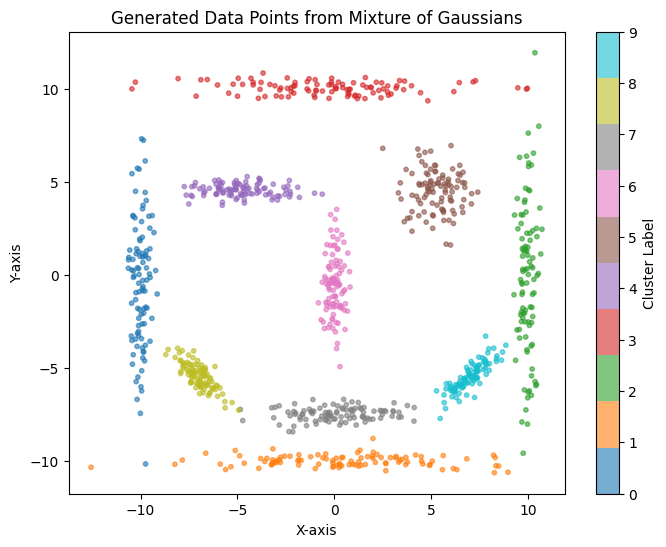

In [14]:
# Visualize the true distribution
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, c=labels, cmap="tab10", s=10)
plt.title("Generated Data Points from Mixture of Gaussians")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.colorbar(label="Cluster Label")

Text(0.5, 1.0, 'K-Means Clustering')

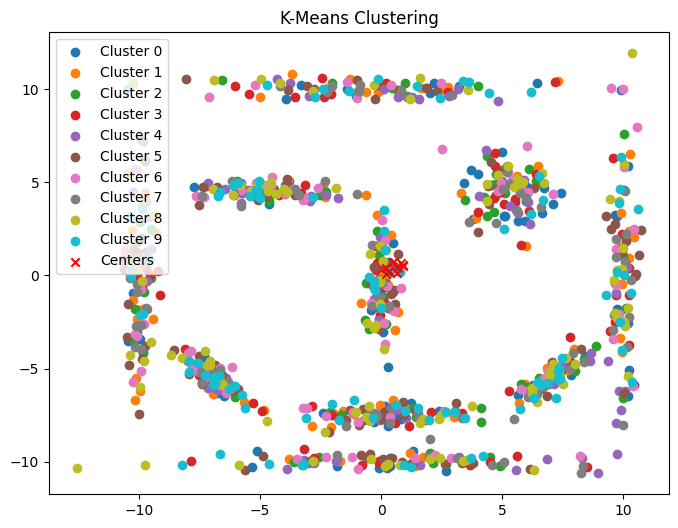

In [15]:
# 1. K-Means Clustering
def run_kmeans(data, n_clusters=3):
    predictions = np.random.randint(0, n_clusters, size=len(data))
    centers = np.random.rand(n_clusters, data.shape[1])

    # TODO: Implement K-Means Algorithm

    return predictions, centers

n_clusters = len(pi)
kmeans_predictions, centers = run_kmeans(data, n_clusters)

# Plot K-Means Results
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(
        data[kmeans_predictions == i, 0], data[kmeans_predictions == i, 1], label=f"Cluster {i}"
    )
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="x", label="Centers")
plt.legend()
plt.title("K-Means Clustering")

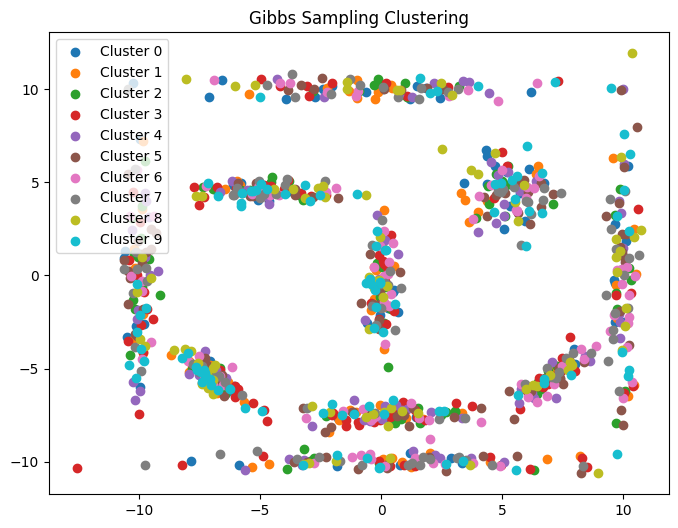

In [16]:
# 2. Gibbs Sampling for Clustering
def gibbs_sampling(data, n_clusters=3, n_samples=500, burn_in=200):
    n_points, dim = data.shape
    cluster_assignments = np.random.choice(n_clusters, n_points)

    return cluster_assignments


gibbs_predictions = gibbs_sampling(data, n_clusters)

# Plot Gibbs Sampling Results
plt.figure(figsize=(8, 6))
for i in range(len(pi)):
    plt.scatter(
        data[gibbs_predictions == i, 0],
        data[gibbs_predictions == i, 1],
        label=f"Cluster {i}",
    )
plt.title("Gibbs Sampling Clustering")
plt.legend()

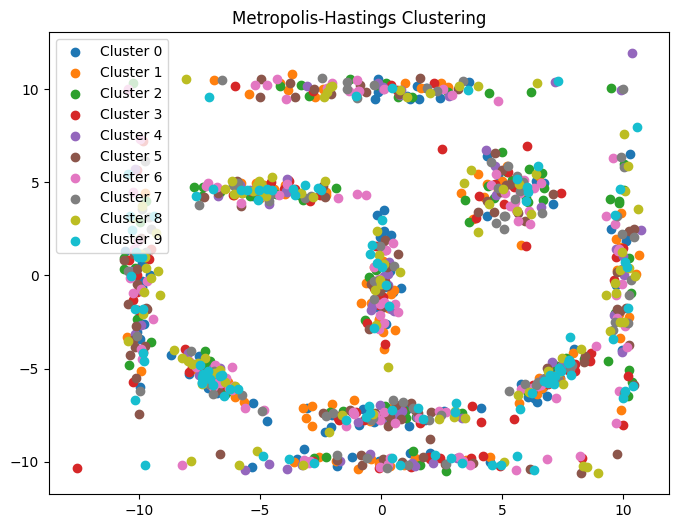

In [17]:
# 3. Metropolis-Hastings for Clustering
def metropolis_hastings(
    data, n_clusters=3, proposal_std=1.0, n_samples=500, burn_in=200
):
    n_points, dim = data.shape
    cluster_assignments = np.random.choice(n_clusters, n_points)

    return cluster_assignments


mh_predictions = metropolis_hastings(data, n_clusters)

# Plot Metropolis-Hastings Results
plt.figure(figsize=(8, 6))
for i in range(len(pi)):
    plt.scatter(
        data[mh_predictions == i, 0], data[mh_predictions == i, 1], label=f"Cluster {i}"
    )
plt.title("Metropolis-Hastings Clustering")
plt.legend()
plt.show()

In [18]:
# Evaluate Clustering Results

# Assuming true_labels is a numpy array containing the true labels of the data points
# and kmeans_predictions, gibbs_predictions, mh_predictions are the predicted labels

# Calculate ARI for each clustering method
kmeans_ari = adjusted_rand_score(labels, kmeans_predictions)
gibbs_ari = adjusted_rand_score(labels, gibbs_predictions)
mh_ari = adjusted_rand_score(labels, mh_predictions)

# Print the ARI results
print("Adjusted Rand Index of Clustering Methods:")
print(f"K-Means ARI: {kmeans_ari:.2f}")
print(f"Gibbs Sampling ARI: {gibbs_ari:.2f}")
print(f"Metropolis-Hastings ARI: {mh_ari:.2f}")


Adjusted Rand Index of Clustering Methods:
K-Means ARI: -0.00
Gibbs Sampling ARI: 0.00
Metropolis-Hastings ARI: 0.00


In [19]:
# Compare Results
print("Comparison of Clustering Results:")
print("K-Means Predictions:", np.bincount(kmeans_predictions))
print("Gibbs Sampling Predictions:", np.bincount(gibbs_predictions))
print("Metropolis-Hastings Predictions:", np.bincount(mh_predictions))

Comparison of Clustering Results:
K-Means Predictions: [111  94  98  99  92 109  94  92 111 100]
Gibbs Sampling Predictions: [ 95  89  95 112  93 119 102 111  83 101]
Metropolis-Hastings Predictions: [103 105  97  93  77 103 124  89 102 107]
